<a href="https://colab.research.google.com/github/Rekg/Yolo_Object-Detection/blob/main/ObjectDetectionYoloElevenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Mar 17 18:46:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip list | grep torch

torch                              2.6.0+cu124
torchaudio                         2.6.0+cu124
torchsummary                       1.5.1
torchvision                        0.21.0+cu124


In [ ]:
%pip install ultralytics roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow
from google.colab import userdata
from roboflow import Roboflow
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEYS')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("huyifei").project("tft-id")
version = project.version(1)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TFT-ID-1 in yolov11:: 100%|██████████| 17224/17224 [00:25<00:00, 681.31it/s] 


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 205MB/s]
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/TFT-ID-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					     PR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			     R_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				     results.csv	    val_batch1_pred.jpg
events.out.tfevents.1742240611.7cd6088a2fc5.15089.0  results.png	    val_batch2_labels.jpg
F1_curve.png					     train_batch0.jpg	    val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg	    weights
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


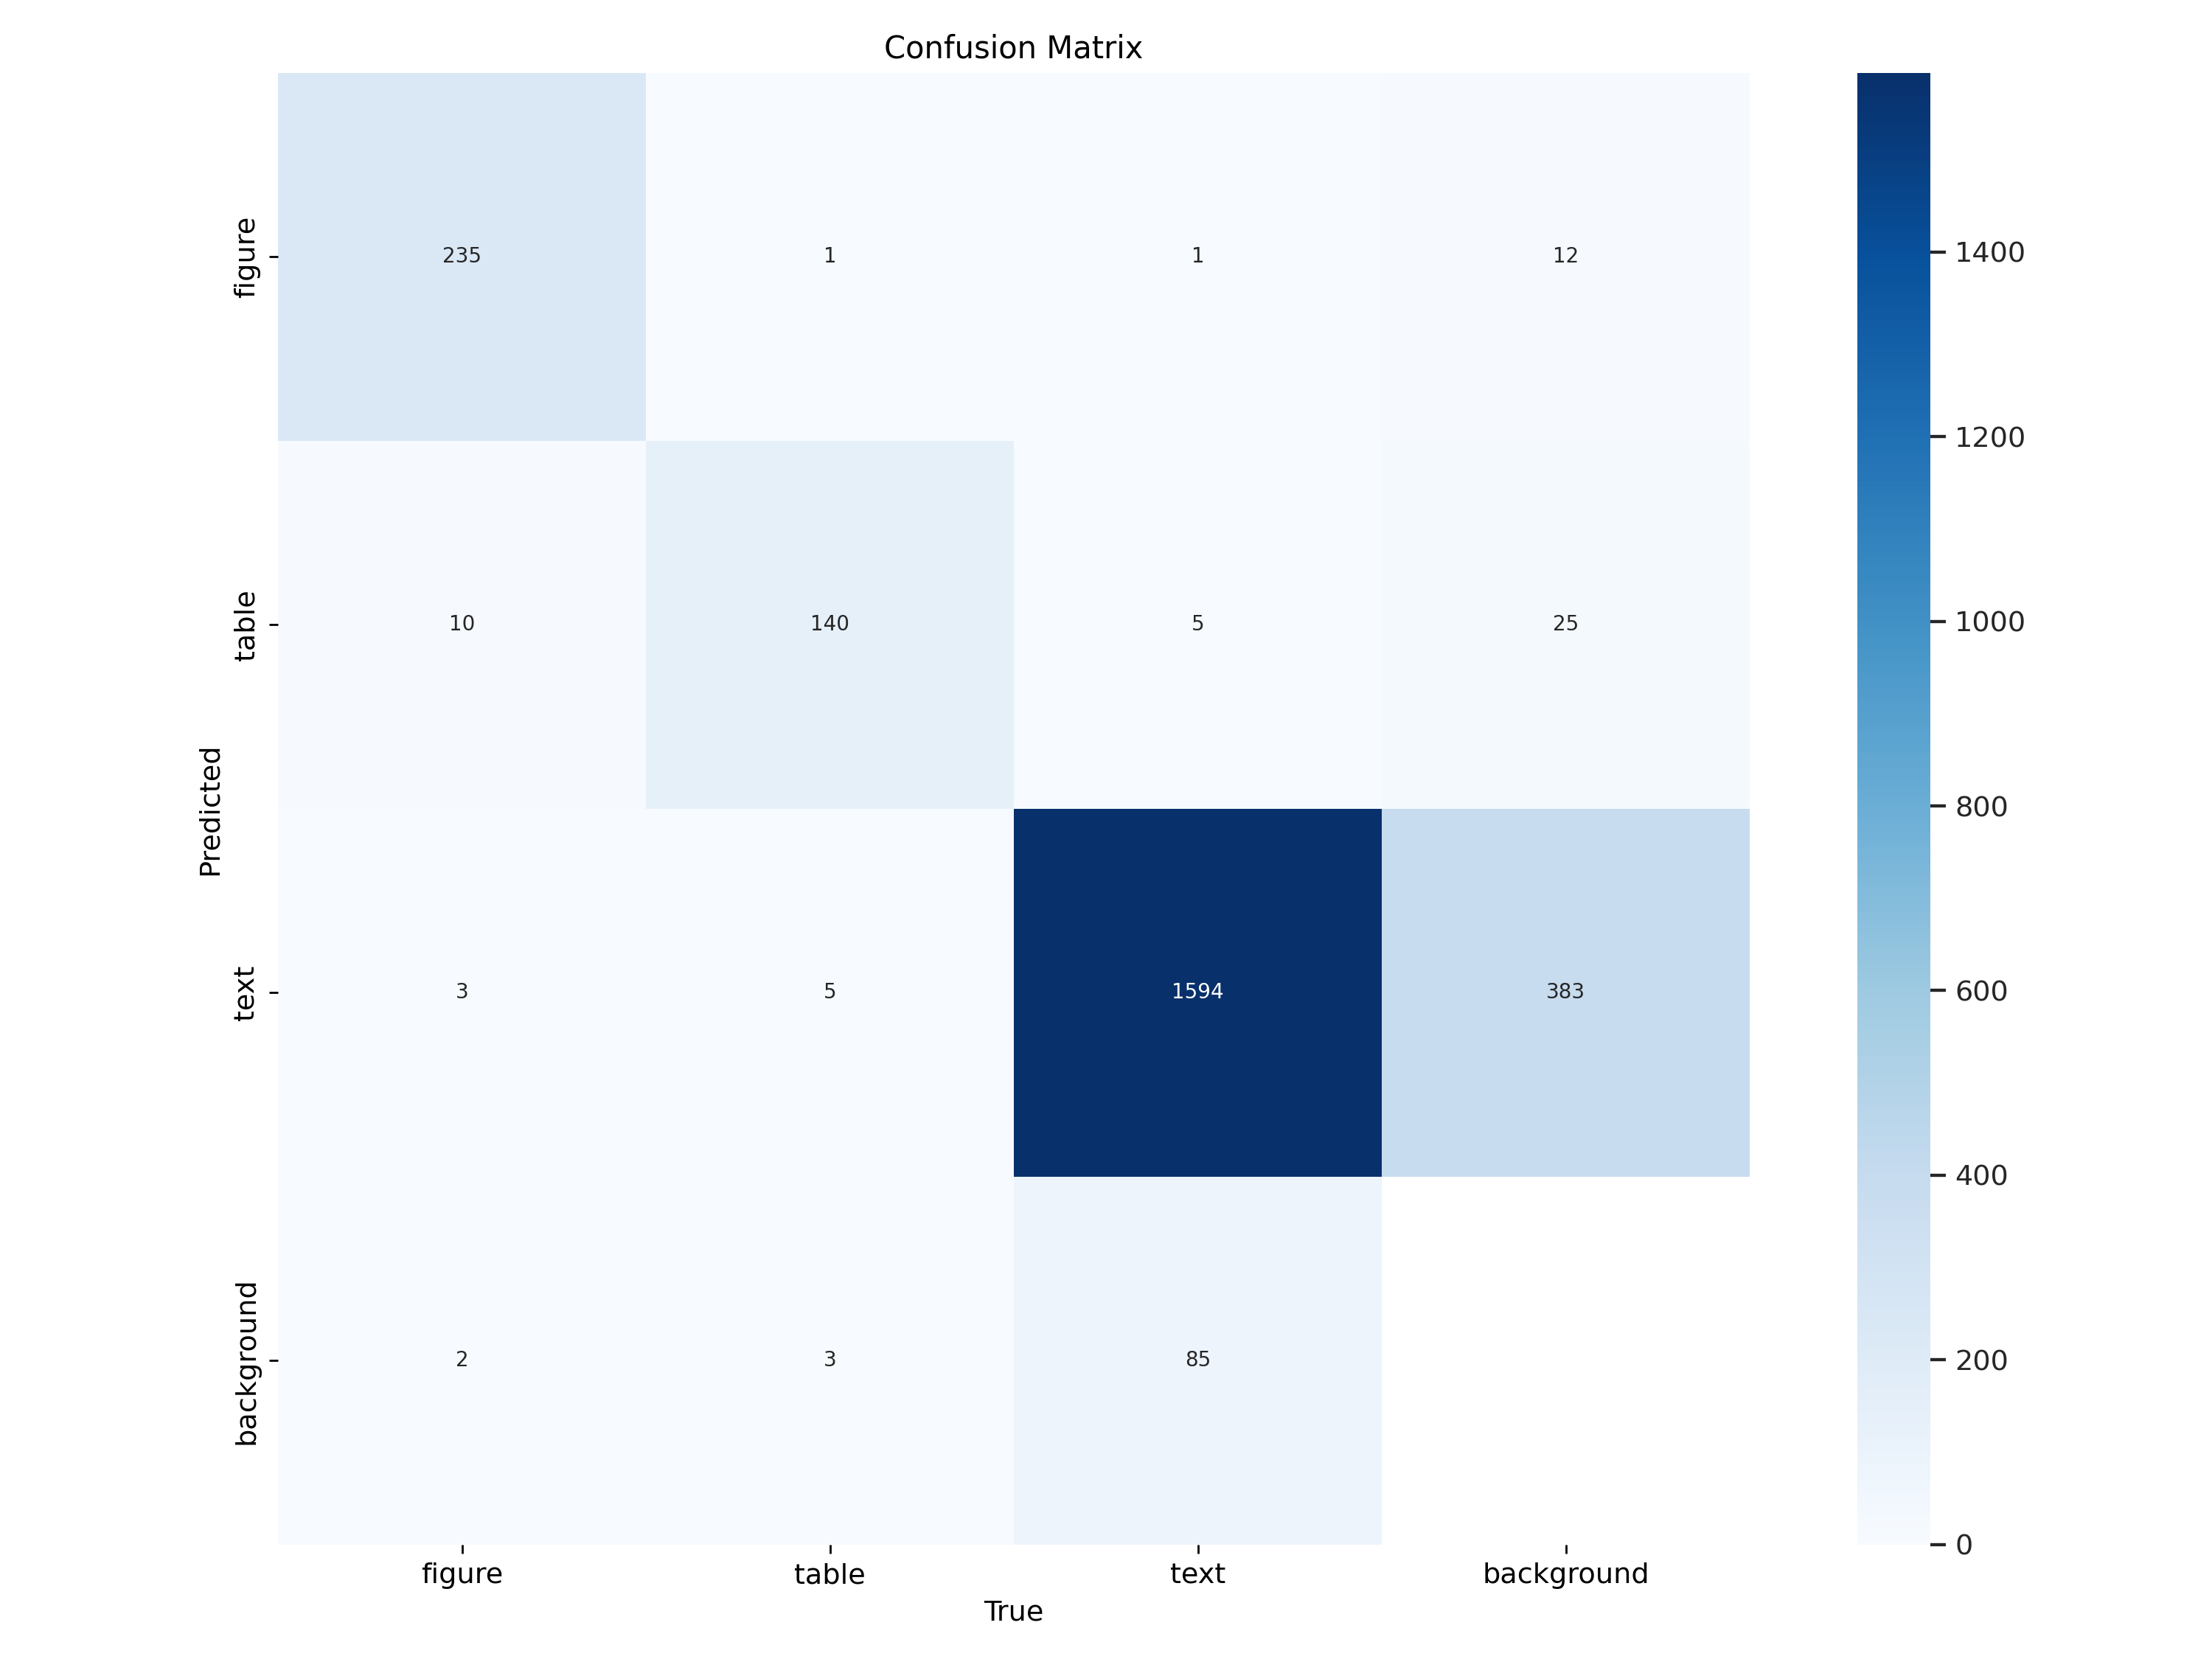

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

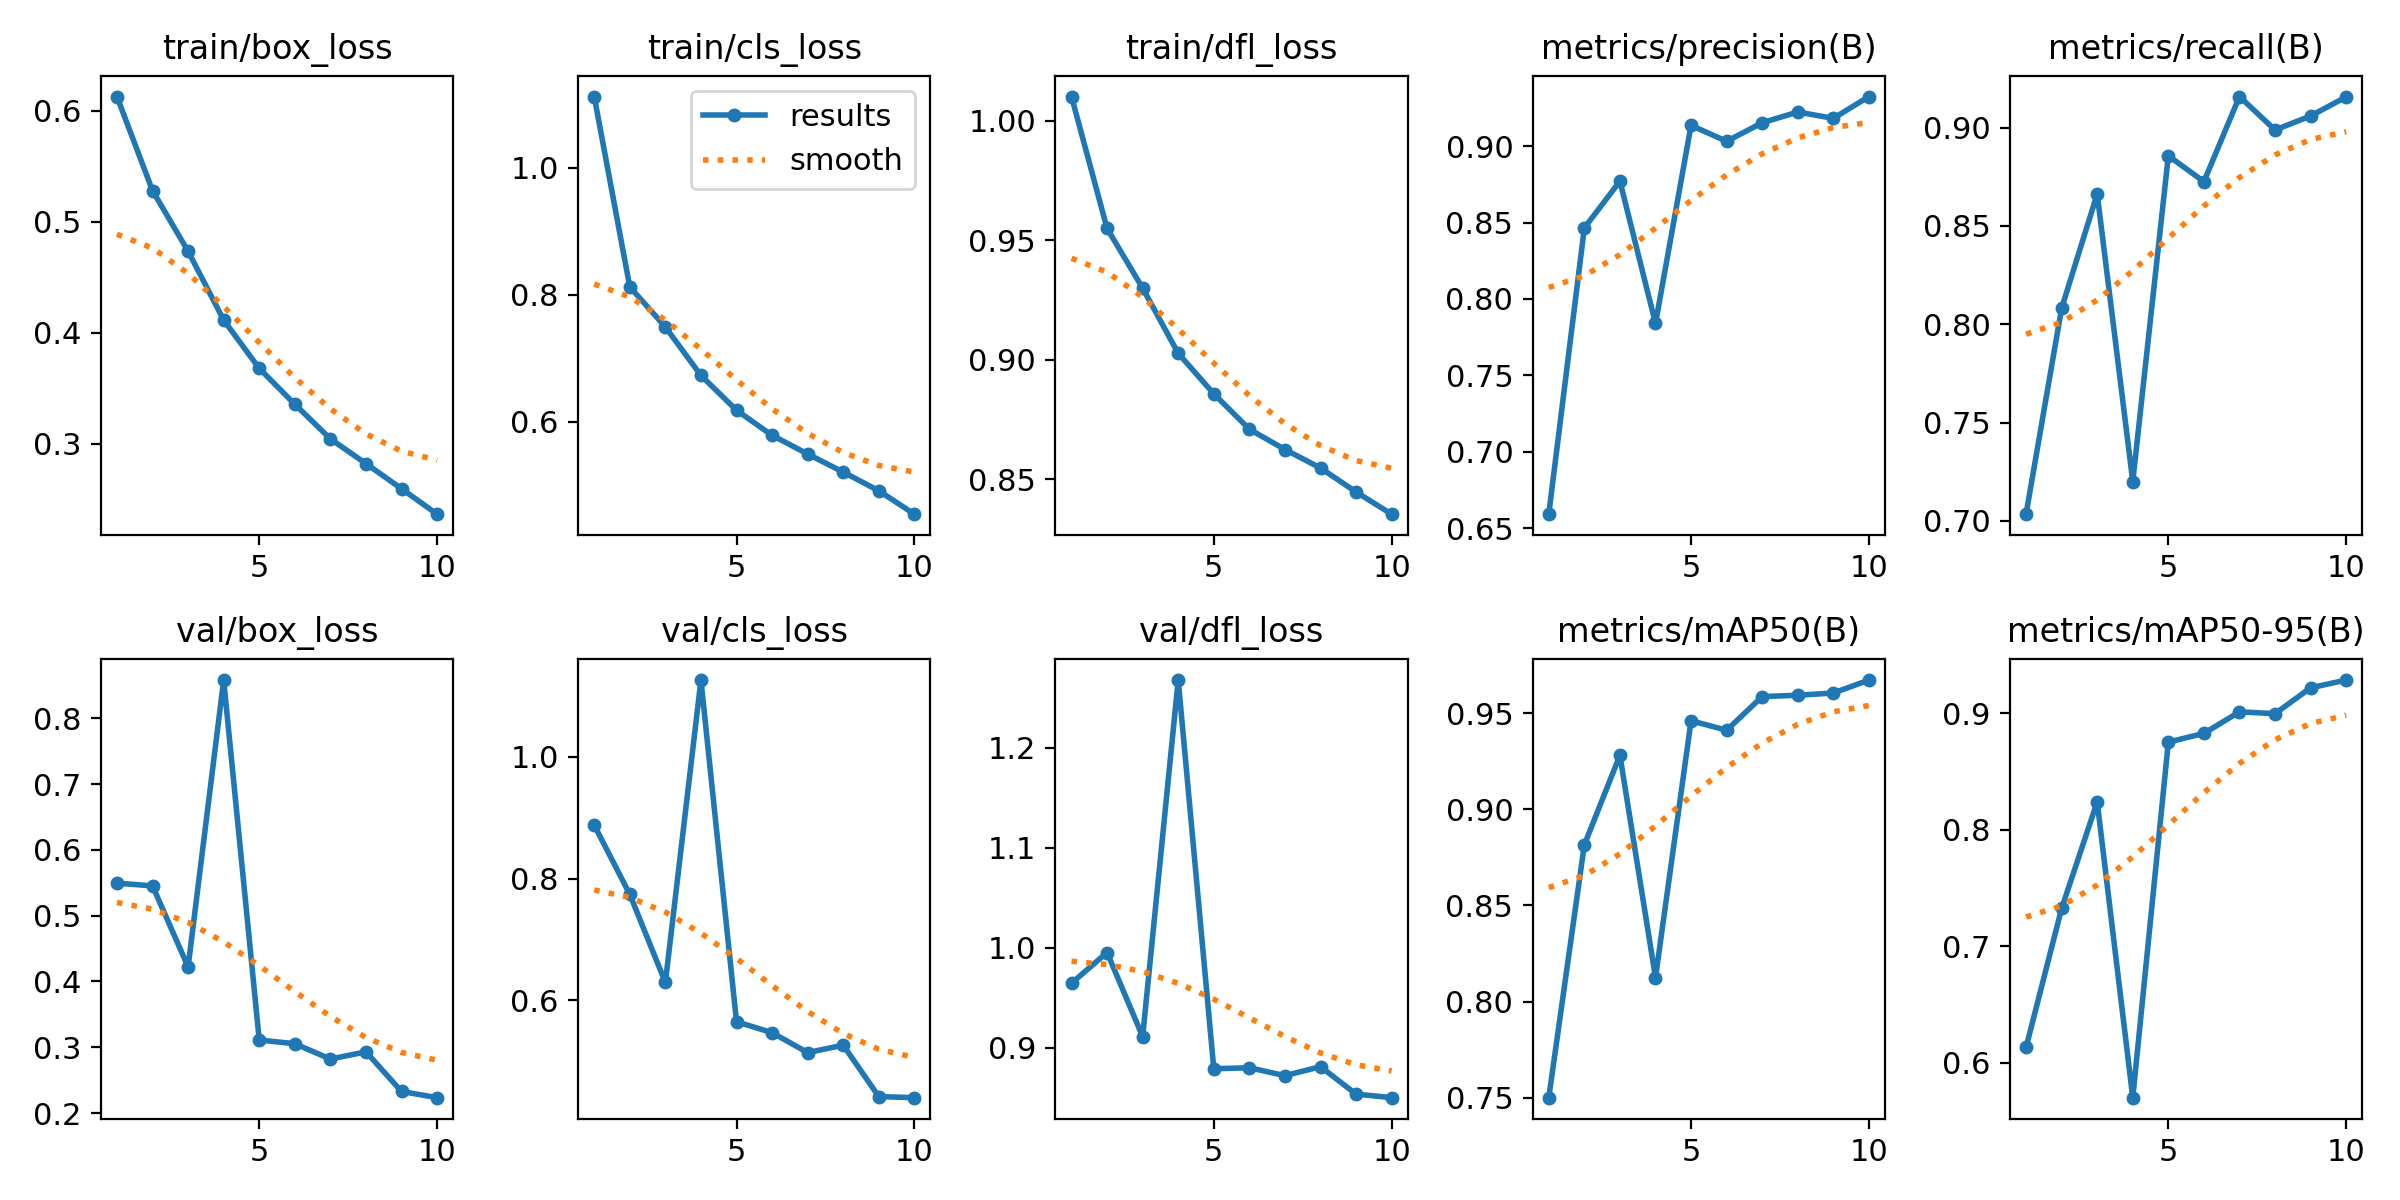

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

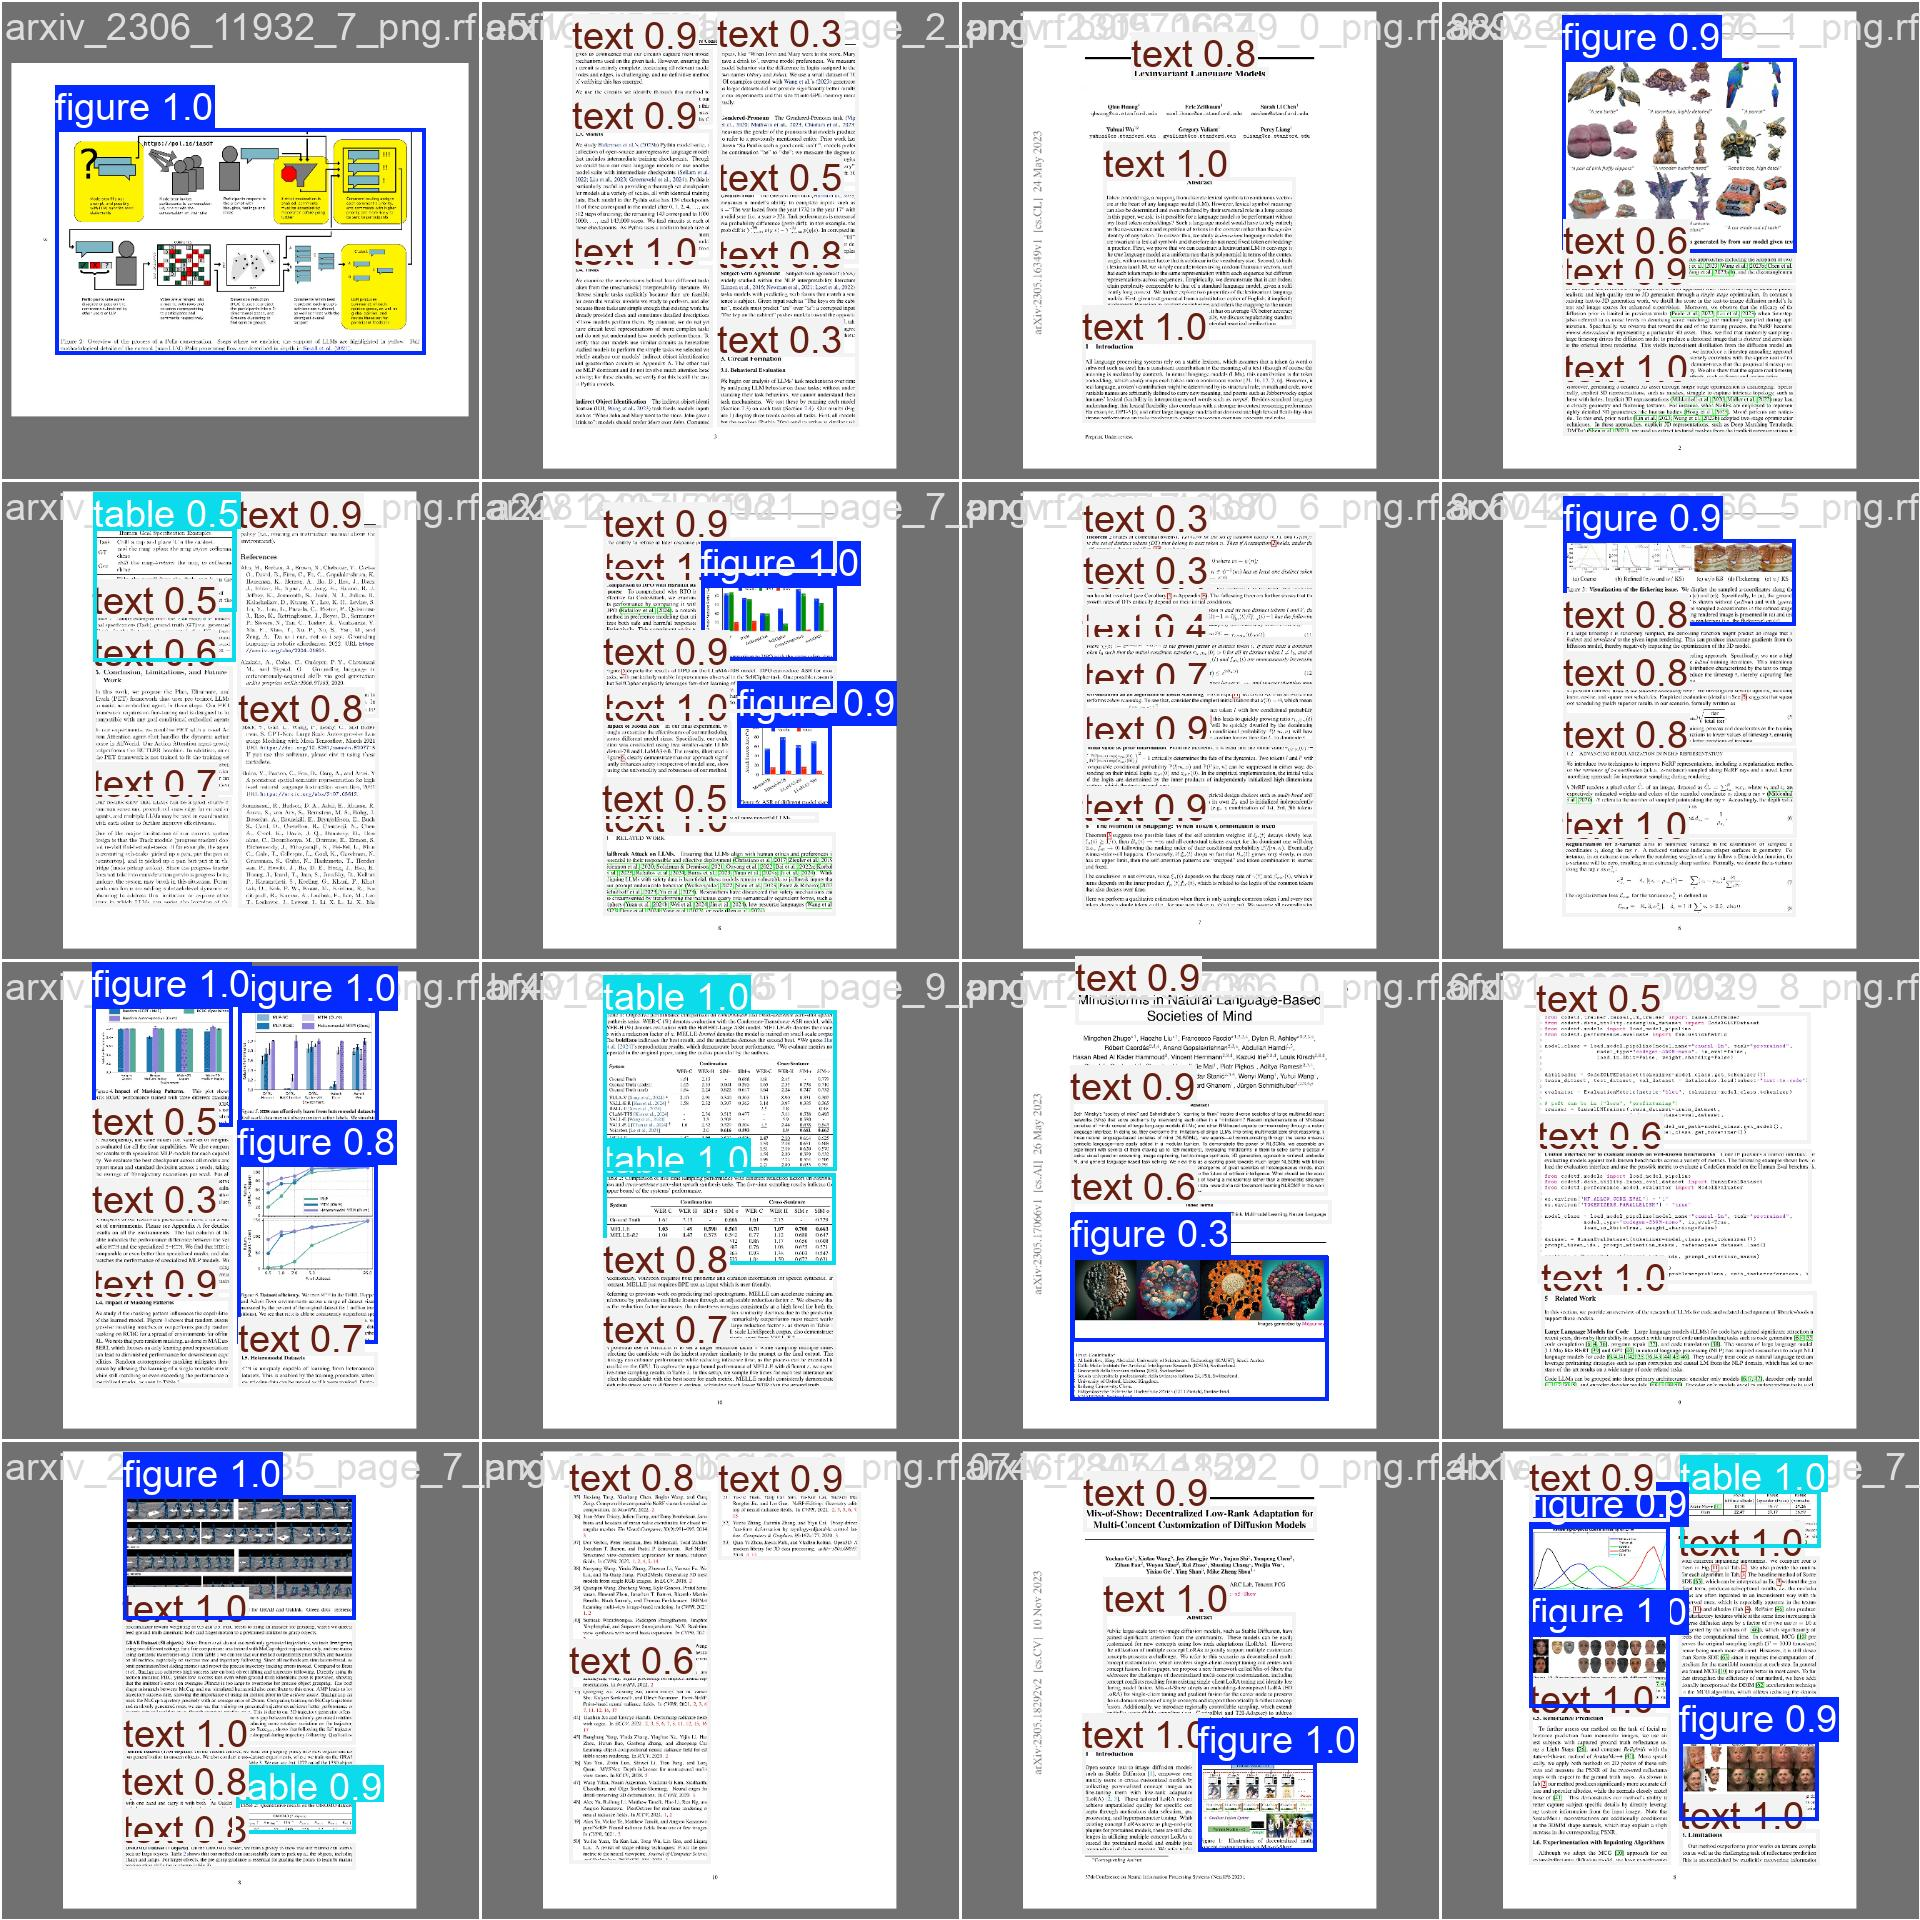

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/TFT-ID-1/valid/labels.cache... 431 images, 2 backgrounds, 0 corrupt: 100% 431/431 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 27/27 [00:09<00:00,  2.77it/s]
                   all        431       2084      0.934      0.914      0.967      0.929
                figure        196        250      0.987      0.936      0.989      0.968
                 table        106        149      0.879      0.933       0.95      0.937
                  text        422       1685      0.936      0.872      0.961      0.882
Speed: 2.7ms preprocess, 7.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
project = rf.workspace("rekik").project("tft-id-jgnxz")
version = project.version(1)
version.deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/rekik/tft-id-jgnxz/1
Share your model with the world at: https://universe.roboflow.com/rekik/tft-id-jgnxz/model/1


In [7]:
import os, random, cv2
!pip install supervision
!pip install inference
import supervision as sv
import IPython
import inference
!pip install roboflow
from google.colab import userdata
from roboflow import Roboflow
!mkdir {HOME}/datasets
%cd {HOME}/datasets
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEYS')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("rekik").project("tft-id-jgnxz")
version = project.version(1)
version.deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")
model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))
# Location of test set images
test_set_loc = dataset.location + "/test/images/"
test_images = os.listdir(test_set_loc)
# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(4, len(test_images))):
  print("Running inference on " + img_name)
  # Load image
  image = cv2.imread(os.path.join(test_set_loc, img_name))
  # Perform inference
  results = model.infer(image, confidence=0.4, overlap=30)[0]
  detections = sv.Detections.from_inference(results)
  # Annotate boxes and labels
  box_annotator = sv.BoxAnnotator()
  label_annotator = sv.LabelAnnotator()
  annotated_image = box_annotator.annotate(scene=image, detections=detections)
  annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
  # Display annotated image
  ret = cv2.imencode('.jpg', annotated_image)
  i = IPython.display.Image(data=ret)
  IPython.display.display(i)

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...


NameError: name 'HOME' is not defined